### Proof of concept for 2024 PhySoc x Optica Hackathon

* This script provides an example of the work that could be carried out during the planned PhySoc hackathon.
* These tasks were designed at a difficulty level accessible to those in their first year of undergraduate physics at the University of Bath.
* The broud theme of this hackathon will be space exploration, with the task of finding **habitable** exoplanets from a real dataset from the 2023 NASA exoplanet archive.
* The inspiration for this task came from coursework that I carried out in my first year of university study.
* The hackathon will be carried out using Python as this is the language that students are familiar with.
* The focus will be on data analysis and visualisation.

* Simply select "Run all" to see end result (must have up to date version of Python installed on your computer).


In [1]:
#import relevant modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({'font.size':16}) 


/Users/thomasbourke/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


From here on is work that the typical attendee might carry out to assess the planet's habitability:

In [2]:
raw_data = pd.read_csv('./data/2023-exoplanet-data.csv')
raw_data

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,75 Cet c,75 Cet,1,2,2,Radial Velocity,2023,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,3.207,0.272,-0.272,5.09343,0.003932,-0.003932,2023-09-19,2023-08,2023-09-19
1,AF Lep b,AF Lep,1,1,1,Imaging,2023,Paranal Observatory,Published Confirmed,0,...,-0.035,4.926,0.021,-0.021,6.18644,0.001140,-0.001140,2023-06-12,2023-02,2023-06-12
2,AF Lep b,AF Lep,0,1,1,Imaging,2023,Paranal Observatory,Published Confirmed,0,...,-0.035,4.926,0.021,-0.021,6.18644,0.001140,-0.001140,2023-02-25,2023-02,2023-02-25
3,AF Lep b,AF Lep,0,1,1,Imaging,2023,Paranal Observatory,Published Confirmed,0,...,-0.035,4.926,0.021,-0.021,6.18644,0.001140,-0.001140,2023-02-25,2023-02,2023-02-25
4,AU Mic d,AU Mic,1,1,3,Transit Timing Variations,2023,Multiple Observatories,Published Confirmed,0,...,-0.100,4.529,0.020,-0.020,7.84038,0.000731,-0.000731,2023-11-28,2023-12,2023-11-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,WASP-84 c,WASP-84,1,1,2,Transit,2023,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.011,8.855,0.023,-0.023,10.57450,0.000590,-0.000590,2023-07-10,2023-06,2023-07-10
914,WISE J033605.05-014350.4 b,WISE J033605.05-014350.4,1,1,1,Imaging,2023,James Webb Space Telescope (JWST),Published Confirmed,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-03,2023-04,2023-05-03
915,Wolf 1069 b,Wolf 1069,1,1,1,Radial Velocity,2023,Calar Alto Observatory,Published Confirmed,0,...,-0.049,8.095,0.021,-0.021,12.36530,0.000435,-0.000435,2023-02-25,2023-02,2023-02-25
916,rho CrB d,rho CrB,1,1,4,Radial Velocity,2023,Lowell Observatory,Published Confirmed,0,...,-0.023,3.857,0.036,-0.036,5.24167,0.002174,-0.002174,2023-07-11,2023-08,2023-07-11


In [3]:
print(f"Planet data columns = {raw_data.columns}")
planet_columns = {'pl_name', 'hostname', 'pl_orbper', 'pl_orbsmax',
       'pl_orbeccen', 'pl_bmasse', 'pl_rade'}
star_columns = {'hostname', 'ra', 'dec', 'st_mass', 'st_rad', 'sy_dist',
       'sy_gaiamag'}

planet_data = raw_data[planet_columns]
star_data = raw_data[star_columns]

#merge dataset:
exo_data = pd.merge(left=planet_data, right=star_data, on='hostname', how='outer')

exo_data


Planet data columns = Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_m

,pl_orbeccen,pl_orbper,hostname,pl_rade,pl_orbsmax,pl_bmasse,pl_name,ra,dec,sy_dist,sy_gaiamag,st_mass,st_rad
0,0.023,2051.620,75 Cet,NaN,3.9290,289.85951,75 Cet c,38.039160,-1.035027,82.96130,5.09343,1.92,10.38
1,0.240,8030.000,AF Lep,NaN,8.4000,1017.05090,AF Lep b,81.769922,-11.901175,26.85640,6.18644,1.20,1.25
2,0.240,8030.000,AF Lep,NaN,8.4000,1017.05090,AF Lep b,81.769922,-11.901175,26.85640,6.18644,1.20,1.25
3,0.240,8030.000,AF Lep,NaN,8.4000,1017.05090,AF Lep b,81.769922,-11.901175,26.85640,6.18644,1.13,NaN
4,0.470,7520.000,AF Lep,NaN,7.9900,1664.46737,AF Lep b,81.769922,-11.901175,26.85640,6.18644,1.20,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5991,NaN,15.564,Wolf 1069,NaN,0.0672,1.26000,Wolf 1069 b,306.524248,58.575304,9.58341,12.36530,0.17,0.18
5992,0.000,282.200,rho CrB,NaN,0.8270,21.60000,rho CrB d,240.260064,33.300186,17.46710,5.24167,0.95,1.34
5993,0.000,282.200,rho CrB,NaN,0.8270,21.60000,rho CrB d,240.260064,33.300186,17.46710,5.24167,0.95,1.34
5994,0.126,12.949,rho CrB,NaN,0.1061,3.79000,rho CrB e,240.260064,33.300186,17.46710,5.24167,0.95,1.34


Text(0.5, 1.0, 'Histogram for Exoplanet Orbital Periods')

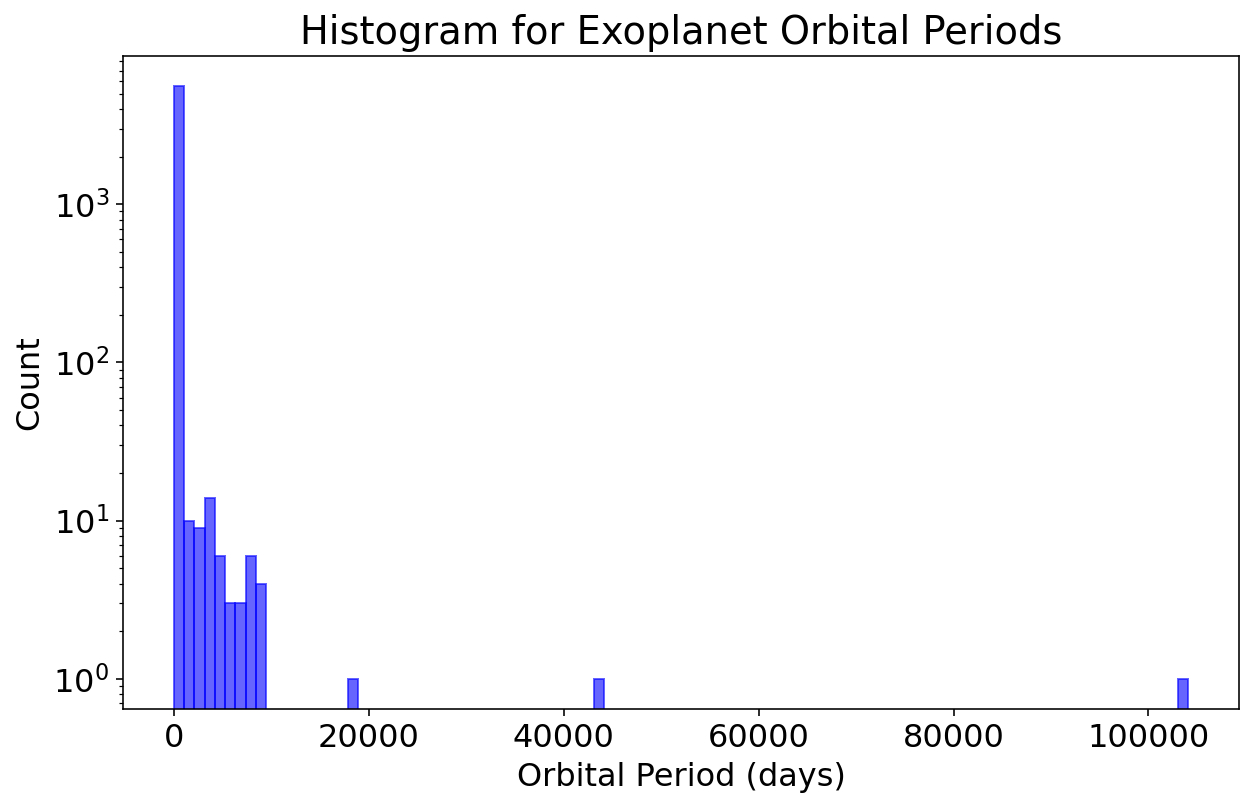

In [4]:
# Orbital period of each exoplanet is an important metric; Let's choose to visualise these as a histogram

#mask to remove NaNs from dataset:

exo_data = exo_data[exo_data['pl_orbper'].notna()]

#Plot histogram:

orbital_period_histogram = plt.figure(figsize=(10,6))
ax1 = orbital_period_histogram.add_subplot(1,1,1)

bins = np.linspace(exo_data['pl_orbper'].min(), exo_data['pl_orbper'].max(), 100)

ax1.hist(exo_data['pl_orbper'], bins = bins, color = 'blue', alpha = 0.6, edgecolor= 'blue')
ax1.set_xlabel('Orbital Period (days)')
ax1.set_ylabel('Count')
ax1.set_yscale('log')
ax1.set_title('Histogram for Exoplanet Orbital Periods')


* There is opportunity here for lots of creativity in visualising this dataset. A primitive example is shown above, advanced students may choose to display other types of plot.
* Suggestions must be made by us of ideas that students should carry out, and in general, the more difficult the ideas executed, the more points it should recieve.

Kepler's 3rd law is a metric that will likely be calculated by all attendees, it is a useful equation that relates a planets orbital period to it's semi-major axis:

$a^3 = \frac{GM}{4\pi^2} T^2$ [SI units]

In [5]:
#Using Kepler's 3rd law:

G = 6.674e-11 #gravitational constant

def semi_major_axis(period_seconds, starmass):
    """Function returns the semi-major axis of a given exoplanet

    Args:
        period_seconds (_type_): _description_
        starmass (_type_): _description_

    Returns:
        _type_: _description_
    """
    a_cubed = (G*starmass / 4*np.pi**2) * period_seconds**2
    a = a_cubed**(1/3)
    
    a = a/1.5e11 #converts to Astronomical Units
    return a

#create additional dataframe with data relevant to Kepler's 3rd law:
#orbital period [days], semi-major axis [days], star mass [solar masses]


#Could go down this path, calculate semi-major axis from orbital period, compare with measured sma
#Potential for more data visualisation -> residuals

# Habitability of exoplanets:

* This is the main avenue that we will encourage attendees to explore.
* Some indicators of habitability can and will include:
    * Temperature (this is the main one) -> Can liquid water be sustained?
    * Mass density of planet
    * Bondi radius of planet
    * Surface gravity of exoplanet
* These can all be calculated from the provided data.


* We will ask hacker teams to finish their hackathon with a short (~10 minute) presentation to present their findings.
* This introduces a presentational aspect to the challenge that we hope will introduce another avenue of creativity for the attendees.

# Key equations:

1. Stellar luminosity, temperature and stellar radius are related by the equation:
$ \frac{L}{L_\odot} = (\frac{R}{R_\odot})^2 (\frac{T_{eff}}{T_{eff_\odot}})^4 $
Where $T_{eff_\odot}$ = $5756K$ and $R_\odot$ = $696340km$, which are the temperature and radius of the Sun.

2. Mass density: Mass / volume -> Model has sphere

3. Surface gravity: $\frac{4\pi}{3} G \rho R_P$

4. Bondi radius: $\frac{G M_P}{c_{sound}^2}$

5. Exoplanet temperature: $T_p \approx T_{eff}\sqrt(\frac{0.9R_{star}}{2a})$

In [6]:
exo_data

,pl_orbeccen,pl_orbper,hostname,pl_rade,pl_orbsmax,pl_bmasse,pl_name,ra,dec,sy_dist,sy_gaiamag,st_mass,st_rad
0,0.023,2051.620,75 Cet,NaN,3.9290,289.85951,75 Cet c,38.039160,-1.035027,82.96130,5.09343,1.92,10.38
1,0.240,8030.000,AF Lep,NaN,8.4000,1017.05090,AF Lep b,81.769922,-11.901175,26.85640,6.18644,1.20,1.25
2,0.240,8030.000,AF Lep,NaN,8.4000,1017.05090,AF Lep b,81.769922,-11.901175,26.85640,6.18644,1.20,1.25
3,0.240,8030.000,AF Lep,NaN,8.4000,1017.05090,AF Lep b,81.769922,-11.901175,26.85640,6.18644,1.13,NaN
4,0.470,7520.000,AF Lep,NaN,7.9900,1664.46737,AF Lep b,81.769922,-11.901175,26.85640,6.18644,1.20,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5991,NaN,15.564,Wolf 1069,NaN,0.0672,1.26000,Wolf 1069 b,306.524248,58.575304,9.58341,12.36530,0.17,0.18
5992,0.000,282.200,rho CrB,NaN,0.8270,21.60000,rho CrB d,240.260064,33.300186,17.46710,5.24167,0.95,1.34
5993,0.000,282.200,rho CrB,NaN,0.8270,21.60000,rho CrB d,240.260064,33.300186,17.46710,5.24167,0.95,1.34
5994,0.126,12.949,rho CrB,NaN,0.1061,3.79000,rho CrB e,240.260064,33.300186,17.46710,5.24167,0.95,1.34
